<a href="https://colab.research.google.com/github/pvpogorelova/metrics_24_25/blob/main/RDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sharp RDD: пример с партией власти.**

In [6]:
pip install rdrobust

In [7]:
import pandas as pd
import numpy as np
from rdrobust import rdplot, rdbwselect, rdrobust
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
data_rdd = pd.read_stata("https://docs.google.com/uc?id=1xWHmST5FYcfLxe9V7Hwqd2LIy_A3ninG&export=download")

# Переименование столбцов и выбор нужных колонок
data_rdd.rename(columns={'rv': 'x_score_victorymargin',
                         'dv_money': 'y_donationshare',
                         'statelevel': 'cov_statelevel',
                         'total_race_money': 'cov_total_race_money',
                         'total_votes': 'cov_total_votes',
                         'dem_inc': 'cov_dem_inc',
                         'rep_inc': 'cov_rep_inc',
                         'total_group_money': 'cov_total_group_money'},
                inplace=True)

# Выбор необходимых столбцов
columns_to_keep = ['x_score_victorymargin',
                   'y_donationshare',
                   'cov_statelevel',
                   'cov_total_race_money',
                   'cov_total_votes',
                   'cov_dem_inc',
                   'cov_rep_inc',
                   'cov_total_group_money',
                   'state',
                   'dist',
                   'year']

data_rdd = data_rdd[columns_to_keep]

In [ ]:
data_rdd

,x_score_victorymargin,y_donationshare,cov_statelevel,cov_total_race_money,cov_total_votes,cov_dem_inc,cov_rep_inc,cov_total_group_money,state,dist,year,colour
0,-5.498560,6.119337,0.0,NaN,NaN,NaN,NaN,NaN,AK,90.0,1978.0,Control Group
1,-24.078474,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,AK,90.0,1980.0,Control Group
2,-21.150679,39.586037,0.0,NaN,NaN,NaN,NaN,NaN,AK,90.0,1982.0,Control Group
3,-6.677437,30.142197,0.0,NaN,NaN,NaN,NaN,NaN,AK,90.0,1984.0,Control Group
4,-7.705765,34.415070,0.0,NaN,NaN,NaN,NaN,NaN,AK,90.0,1986.0,Control Group
...,...,...,...,...,...,...,...,...,...,...,...,...
39198,50.000000,100.000000,1.0,1265.199951,2248.0,1.0,0.0,1125.0,WY,60.0,2002.0,Treatment Group
39199,50.000000,100.000000,1.0,1425.000000,2952.0,1.0,0.0,1425.0,WY,60.0,2004.0,Treatment Group
39200,50.000000,100.000000,1.0,1875.000000,2395.0,1.0,0.0,1875.0,WY,60.0,2006.0,Treatment Group
39201,50.000000,76.950470,1.0,3125.000000,2891.0,1.0,0.0,2700.0,WY,60.0,2008.0,Treatment Group


In [ ]:
data_rdd['colour'] = np.where(data_rdd['x_score_victorymargin'] >= 0, 'Treatment Group', 'Control Group')

# Строим график
fig = px.scatter(
    data_frame=data_rdd,
    x='x_score_victorymargin',
    y='y_donationshare',
    color='colour',
    title="Margin of Victory and Donation Share",
    labels={
        'x_score_victorymargin': 'Democratic margin of victory at t',
        'y_donationshare': 'Democratic share of contributions at t+1'
    },
    category_orders={"colour": ["Treatment Group", "Control Group"]}
)

# Настраиваем оси
fig.update_layout(
    xaxis=dict(
        title='Democratic margin of victory at t',
        dtick=25
    ),
    yaxis=dict(
        title='Democratic share of contributions at t+1'
    )
)

fig.show()

Mass points detected in the running variable.
Mass points detected in the running variable.
Mass points detected in the running variable.
Mass points detected in the running variable.


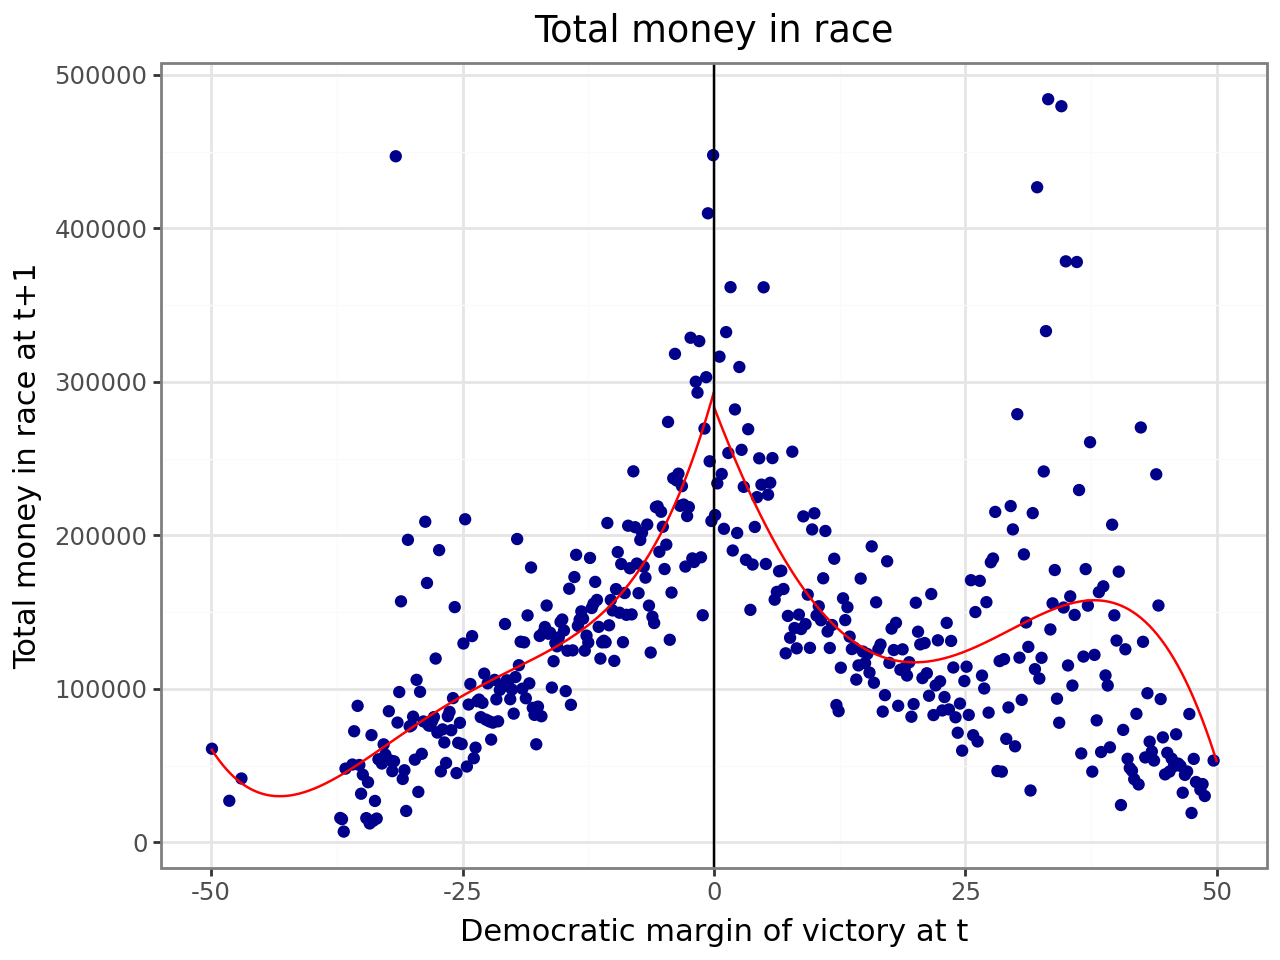

Mass points detected in the running variable.
Mass points detected in the running variable.
Mass points detected in the running variable.
Mass points detected in the running variable.


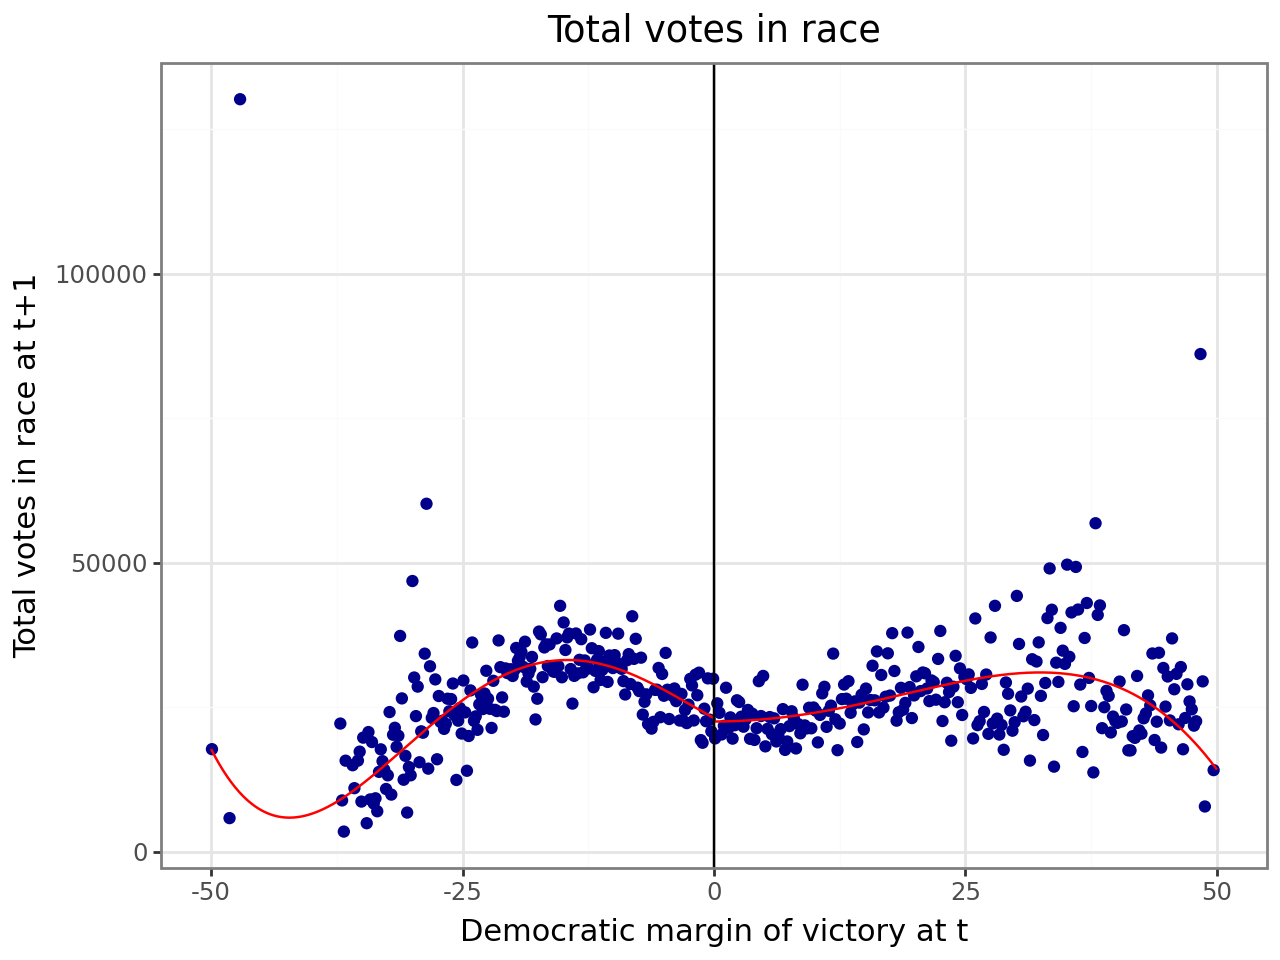

Call: rdplot
Number of Observations:                 32670
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations         16281      16389
Number of Effective Obs        16281      16389
Bandwith poly. fit (h)          50.0       50.0
Number of bins scale               1          1
Bins Selected                    286        230
Average Bin Length             0.186      0.217
Median Bin Length              0.175      0.217
IMSE-optimal bins               31.0       24.0
Mimicking Variance bins        286.0      230.0

Relative to IMSE-optimal:
Implied scale                  9.226      9.583
WIMSE variance weight          0.001      0.001
WIMSE bias weight              0.999      0.999


In [ ]:
# Total money in race
cov_total_race_money = data_rdd['cov_total_race_money'].values
x_score_victorymargin = data_rdd['x_score_victorymargin'].values

# Подбор ширины окна
bandwidth = rdbwselect(cov_total_race_money, x_score_victorymargin)

# Анализ разрывной регрессии
results = rdrobust(y=cov_total_race_money, x=x_score_victorymargin, c=0)

# Выводим сводную статистику
print(results.coef)

# Построение графика
rdplot(y=cov_total_race_money, x=x_score_victorymargin,  title='Total money in race',
       x_label='Democratic margin of victory at t', y_label='Total money in race at t+1')


# Total votes in race
cov_total_votes = data_rdd['cov_total_votes'].values

# Подбор ширины окна
bandwidth = rdbwselect(cov_total_votes, x_score_victorymargin)

# Анализ разрывной регрессии
results = rdrobust(y=cov_total_votes, x=x_score_victorymargin, c=0)

# Выводим сводную статистику
print(results.coef)

# Построение графика
rdplot(y=cov_total_votes, x=x_score_victorymargin, title='Total votes in race',
       x_label='Democratic margin of victory at t', y_label='Total votes in race at t+1')



Mass points detected in the running variable.
Mass points detected in the running variable.
Mass points detected in the running variable.
                    Coeff
Conventional    21.107942
Bias-Corrected  20.593546
Robust          20.593546
Mass points detected in the running variable.


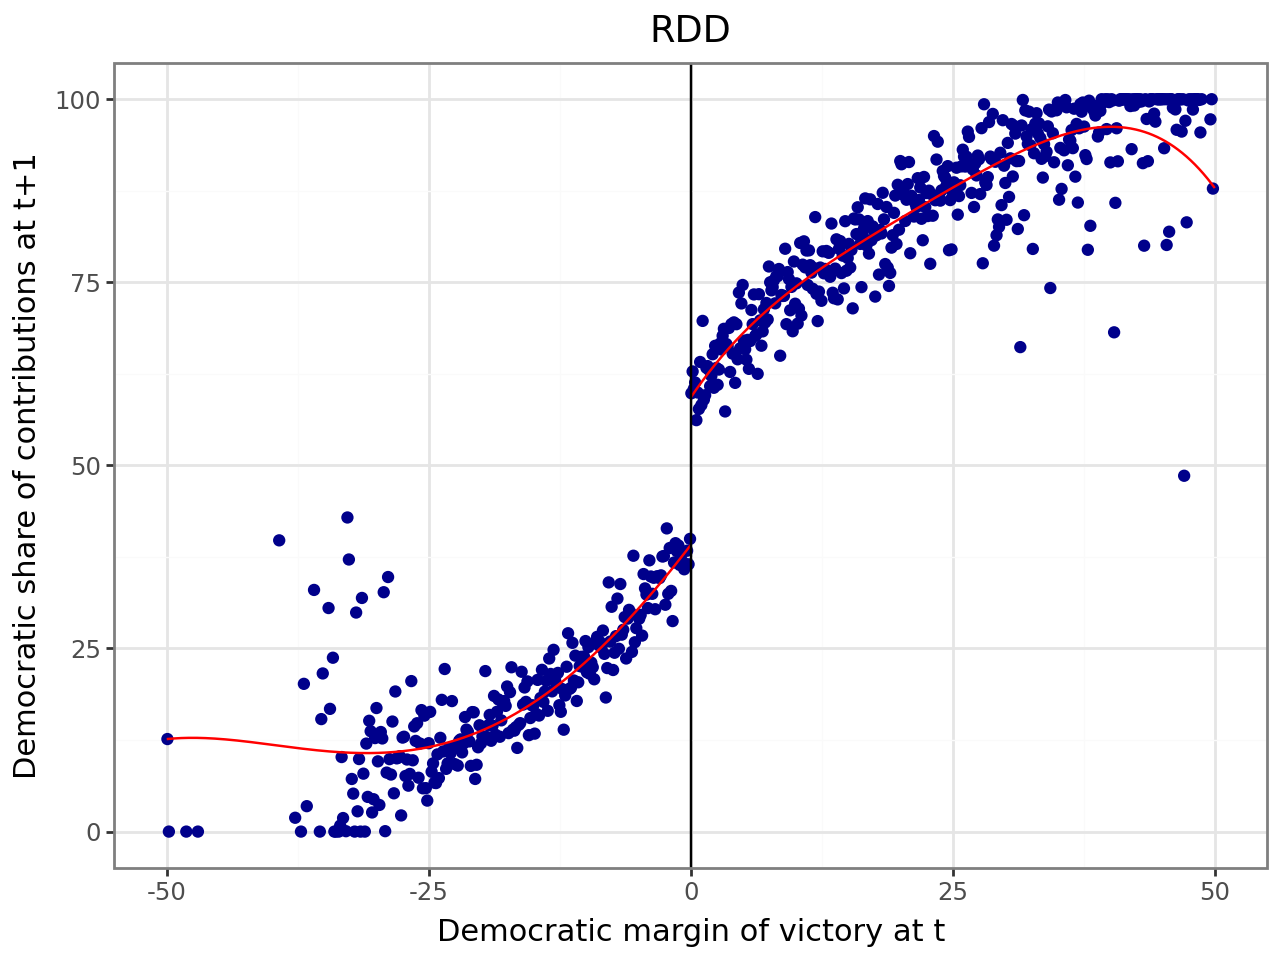

Call: rdplot
Number of Observations:                 31529
Kernel:                               Uniform
Polynomial Order Est. (p):                  4

                                Left      Right
------------------------------------------------
Number of Observations         15286      16243
Number of Effective Obs        15286      16243
Bandwith poly. fit (h)          50.0       50.0
Number of bins scale               1          1
Bins Selected                    361        419
Average Bin Length             0.133      0.119
Median Bin Length              0.139      0.119
IMSE-optimal bins               25.0       32.0
Mimicking Variance bins        361.0      419.0

Relative to IMSE-optimal:
Implied scale                  14.44     13.094
WIMSE variance weight            0.0        0.0
WIMSE bias weight                1.0        1.0


In [ ]:
# Локальная полиномиальная регрессия в RDD
y_donationshare = data_rdd['y_donationshare'].values
x_score_victorymargin = data_rdd['x_score_victorymargin'].values

# Подбор ширины окна
bandwidth = rdbwselect(y_donationshare, x_score_victorymargin)

# Анализ разрывной регрессии
rdd_results = rdrobust(y=y_donationshare, x=x_score_victorymargin, c=0)

# Выводим сводную статистику
print(rdd_results.coef)

# Изобразим результаты RDD на графике
rdplot(y=y_donationshare, x=x_score_victorymargin, c=0,
       x_label='Democratic margin of victory at t',
       y_label='Democratic share of contributions at t+1',
       title='RDD')

In [ ]:
# Плацебо тест: попробуем изменить cutoff
# cutoff (значение переменной отбора) c = 1
y_donationshare = data_rdd['y_donationshare'].values
x_score_victorymargin = data_rdd['x_score_victorymargin'].values

# Анализ разрывной регрессии с c = 1
rdd_c1 = rdrobust(y=y_donationshare, x=x_score_victorymargin, c=1, all=True)
print(f"\nCutoff c = 1:\n{rdd_c1.pv}")

# cutoff (значение переменной отбора) c = -3
# Анализ разрывной регрессии с c = -3
rdd_c3 = rdrobust(y=y_donationshare, x=x_score_victorymargin, c=-3, all=True)
print(f"\nCutoff c = -3:\n{rdd_c3.pv}")

Mass points detected in the running variable.
Mass points detected in the running variable.

Cutoff c = 1:
                   P>|t|
Conventional    0.289638
Bias-Corrected  0.123701
Robust          0.144081
Mass points detected in the running variable.
Mass points detected in the running variable.

Cutoff c = -3:
                   P>|t|
Conventional    0.087510
Bias-Corrected  0.033444
Robust          0.056713


## **Fuzzy RDD**

Студенты сдают вступительный экзамен в начале учебного года.
Если они набирают 70 баллов или ниже, их зачисляют на бесплатную программу репетиторства.
В конце года студенты сдают выпускной экзамен.

Возможно, что некоторые люди набрали больше баллов на вступительном экзамене и каким-то образом воспользовались услугами репетитора, или что некоторые люди набрали меньше баллов, но не приняли участие в программе.


In [17]:
tutoring_program = pd.read_csv("/content/tutoring_program_fuzzy (1).csv")

In [18]:
tutoring_program

,id,entrance_exam,tutoring,tutoring_text,exit_exam
0,1,92.4,False,No tutor,78.1
1,2,72.8,False,No tutor,58.2
2,3,53.7,True,Tutor,62.0
3,4,98.3,False,No tutor,67.5
4,5,69.7,True,Tutor,54.1
...,...,...,...,...,...
995,996,43.7,True,Tutor,65.3
996,997,39.2,True,Tutor,53.6
997,998,90.3,False,No tutor,76.7
998,999,62.2,False,No tutor,59.3


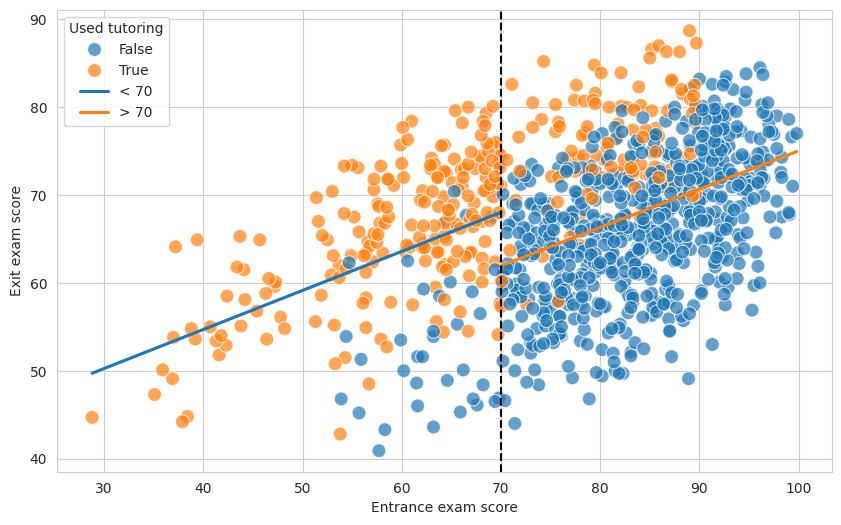

In [21]:
# Создание графика
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x="entrance_exam",
    y="exit_exam",
    hue="tutoring",
    data=tutoring_program,
    s=100,
    alpha=0.7
)

# Добавление линии регрессии для тех, кто набрал меньше 70 баллов
low_data = tutoring_program.query('entrance_exam <= 70')
sns.regplot(
    x="entrance_exam",
    y="exit_exam",
    data=low_data,
    scatter=False,
    ci=None,
    truncate=True,
    label='< 70'
)

# Добавление линии регрессии для тех, кто набрал больше 70 баллов
high_data = tutoring_program.query('entrance_exam > 70')
sns.regplot(
    x="entrance_exam",
    y="exit_exam",
    data=high_data,
    scatter=False,
    ci=None,
    truncate=True,
    label='> 70'
)

# Вертикальная линия на отметке 70 баллов
plt.axvline(70, color='black', linestyle='--')

# Подписи осей
plt.xlabel('Entrance exam score')
plt.ylabel('Exit exam score')
plt.legend(title='Used tutoring')

plt.show()

<ipython-input-25-2b76171351bd>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


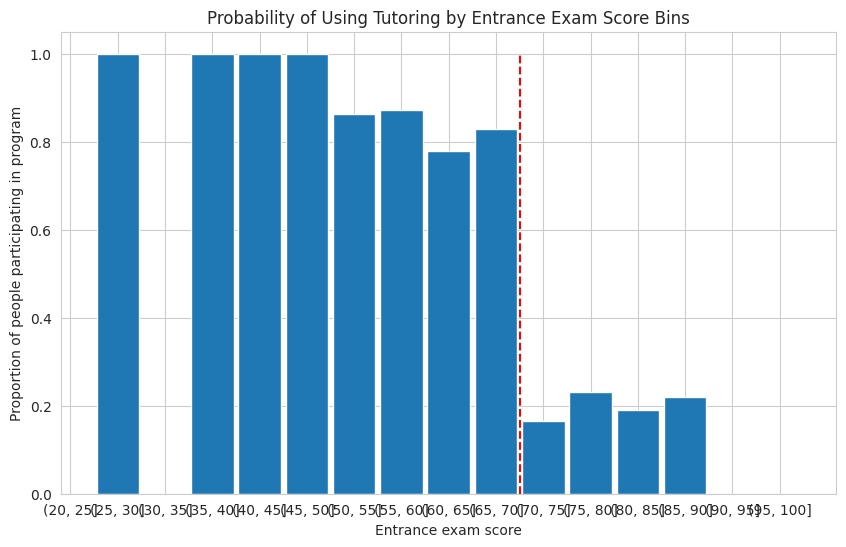

In [25]:
# Разбиение столбца entrance_exam на категории
bins = list(range(0, 101, 5))
labels = [f'({i}, {j}]' for i, j in zip(bins[:-1], bins[1:])]
tutoring_program['exam_binned'] = pd.cut(tutoring_program['entrance_exam'], bins=bins, labels=labels, right=False)

# Группировка по категориям и дамми на занятия у репетитора
grouped = tutoring_program.groupby(['exam_binned', 'tutoring']).size().reset_index(name='count')

pivoted = grouped.pivot(index='exam_binned', columns='tutoring', values='count').fillna(0).reset_index()
pivoted.columns.name = None
pivoted.rename(columns={True: 'tutor_yes', False: 'tutor_no'}, inplace=True)

# Вычисление вероятности занятий у репетитора
pivoted['prob_tutoring'] = pivoted['tutor_yes'] / (pivoted['tutor_yes'] + pivoted['tutor_no'])

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(pivoted['exam_binned'], pivoted['prob_tutoring'], width=0.9)
plt.vlines(13.5, ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.xlabel('Entrance exam score')
plt.ylabel('Proportion of people participating in program')
plt.title('Probability of Using Tutoring by Entrance Exam Score Bins')
plt.grid(True)
plt.show()

In [19]:
tutoring_program['entrance_centered'] = tutoring_program["entrance_exam"] - 70
tutoring_program

,id,entrance_exam,tutoring,tutoring_text,exit_exam,entrance_centered
0,1,92.4,False,No tutor,78.1,22.4
1,2,72.8,False,No tutor,58.2,2.8
2,3,53.7,True,Tutor,62.0,-16.3
3,4,98.3,False,No tutor,67.5,28.3
4,5,69.7,True,Tutor,54.1,-0.3
...,...,...,...,...,...,...
995,996,43.7,True,Tutor,65.3,-26.3
996,997,39.2,True,Tutor,53.6,-30.8
997,998,90.3,False,No tutor,76.7,20.3
998,999,62.2,False,No tutor,59.3,-7.8


In [20]:
mod_rdd = rdrobust(y=tutoring_program['exit_exam'], x=tutoring_program['entrance_centered'], fuzzy=tutoring_program['tutoring'])
mod_rdd.Estimate

Mass points detected in the running variable.
Mass points detected in the running variable.


,tau.us,tau.bc,se.us,se.rb
Estimate,9.350755,9.285789,2.14021,2.549342
